In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("SampleSuperstore.csv")

In [4]:
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
Ship Mode       9994 non-null object
Segment         9994 non-null object
Country         9994 non-null object
City            9994 non-null object
State           9994 non-null object
Postal Code     9994 non-null int64
Region          9994 non-null object
Category        9994 non-null object
Sub-Category    9994 non-null object
Sales           9994 non-null float64
Quantity        9994 non-null int64
Discount        9994 non-null float64
Profit          9994 non-null float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [7]:
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


# Business Questions:

We will try to answer follwing questions based on analysis of given data:
1. Segment based Sales Analysis
2. State based Sales Analysis
3. Category based Sales Analysis

In [48]:
# Q-1: Let's perform segment based analysis
seg_data = data.groupby("Segment")["Sales","Profit","Discount"].sum()
seg_data

,Sales,Profit,Discount
Segment,,,
Consumer,1.161401e+06,134119.2092,820.91
Corporate,7.061464e+05,91979.1340,477.85
Home Office,4.296531e+05,60298.6785,262.33


In [26]:
seg_data.loc["Consumer"].index

Index(['Sales', 'Profit', 'Discount'], dtype='object')

In [36]:
seg_data.loc["Consumer"][0]
data.Segment.unique()

array(['Consumer', 'Corporate', 'Home Office'], dtype=object)

In [41]:
# Function to add value on top of bars in a bargraph
def autolabel(rects, ax, color='r', rot=0):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        # '%g' % is done to drop trainling zeros from decimal position
        ax.annotate('%g' % height,
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', color=color, fontsize=13, rotation=rot)

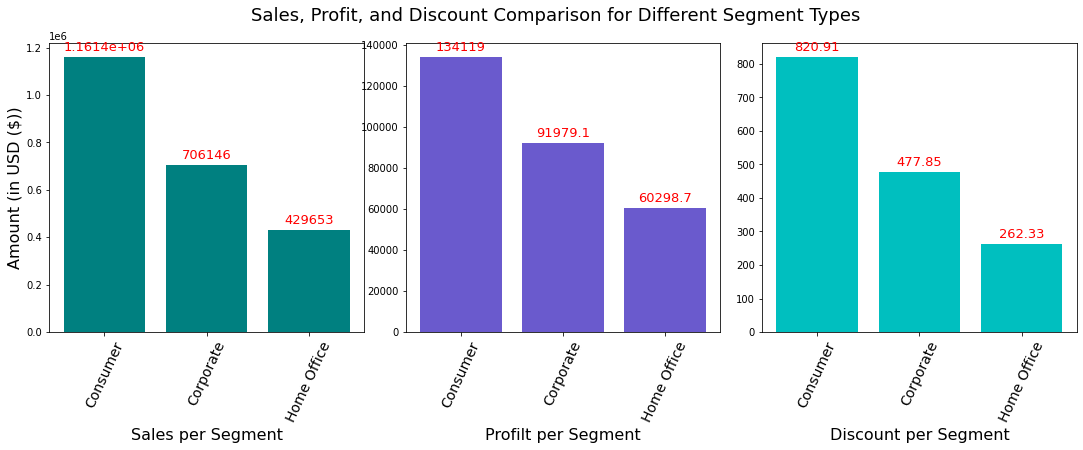

In [47]:
fig, ax = plt.subplots(1,3,figsize=(15,5))
plt.tight_layout()
fig.suptitle('Sales, Profit, and Discount Comparison for Different Segment Types', fontsize=18)
fig.subplots_adjust(top=0.88)
labels = data.Segment.unique()
for i in range(0,3):
        if i==0:
            d = seg_data.loc["Consumer"][0],seg_data.loc["Corporate"][0],seg_data.loc["Home Office"][0]
            color = 'teal'
            label = "Sales per Segment"
        elif i==1:
            d = seg_data.loc["Consumer"][1],seg_data.loc["Corporate"][1],seg_data.loc["Home Office"][1]
            color = 'slateblue'
            label = "Profilt per Segment"
        else:
            d = seg_data.loc["Consumer"][2],seg_data.loc["Corporate"][2],seg_data.loc["Home Office"][2]
            color = 'c'
            label = "Discount per Segment"
            
        bar = ax[i].bar(labels,d, color=color)
        ax[i].tick_params('x', labelrotation=65, labelsize=14)
        ax[i].set_xlabel(label, fontsize=16)        
        if i==0:
            ax[i].set_ylabel('Amount (in USD ($))', fontsize=16)
            
        autolabel(bar, ax[i])

Above bargraphs shows that when we make more sales, we are making more profit even if we are offering more discounts(Its evident in the Cosumer bar graphs for Sales, Profit, and discounts) 

In [49]:
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [60]:
# Q-2: Analysis based on Cities, we will see sales in top 10 cities and bottom 10 cities
cities_data = data.groupby("City")["Sales"].sum()
cities_data = cities_data.sort_values()

In [61]:
cities_data.index

Index(['Abilene', 'Elyria', 'Jupiter', 'Pensacola', 'Ormond Beach',
       'San Luis Obispo', 'Springdale', 'Layton', 'Keller', 'Missouri City',
       ...
       'Springfield', 'Jacksonville', 'San Diego', 'Chicago', 'Houston',
       'Philadelphia', 'San Francisco', 'Seattle', 'Los Angeles',
       'New York City'],
      dtype='object', name='City', length=531)

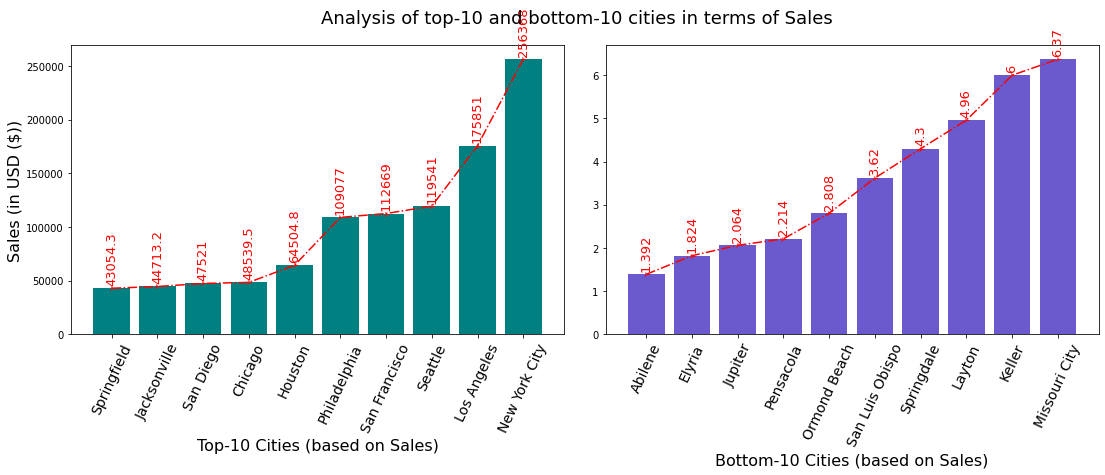

In [67]:
fig, ax = plt.subplots(1,2,figsize=(15,5))
plt.tight_layout()
fig.suptitle('Analysis of top-10 and bottom-10 cities in terms of Sales', fontsize=18)
fig.subplots_adjust(top=0.88)
labels_top = cities_data.index[-10:]
labels_bottom = cities_data.index[:10]
for i in range(0,2):
        if i==0:
            d = cities_data[-10:]
            l = labels_top
            color = 'teal'
            label = "Top-10 Cities (based on Sales)"
        else:
            d = cities_data[:10]
            l = labels_bottom
            color = 'slateblue'
            label = "Bottom-10 Cities (based on Sales)"
            
        bar = ax[i].bar(l,d, color=color)
        ax[i].plot(l,d, '4-.r')
        ax[i].tick_params('x', labelrotation=65, labelsize=14)
        ax[i].set_xlabel(label, fontsize=16)        
        if i==0:
            ax[i].set_ylabel('Sales (in USD ($))', fontsize=16)
            
        autolabel(bar, ax[i], rot=90)

Based on insights from the bar graphs, we can see that <b>New York City (256368 Dollars)</b> is the best city in terms of sales while <b>Abilene (1.392 Dollars)</b> is making least sales. Therefore, we should focus on sales in Bottom-10 cities: 1. We might need to focus on more marketing 2. We can also perform a Market survey to see why we are making less sales